<a href="https://colab.research.google.com/github/Kanki-Studio/Weather/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving london_weather.csv to london_weather.csv


In [ ]:
df = pd.read_csv('london_weather.csv')

In [ ]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### date : recorded date of measurement
### cloud_cover : cloud cover measurement in oktas
### sunshine : sunshine measurement in hours (hrs)
### global_radiation : irradiance measurement in Watt per square meter (W/m2)
### max_temp : maximum temperature recorded in degrees Celsius (°C)
### mean_temp : mean temperature in degrees Celsius (°C)
### min_temp : minimum temperature recorded in degrees Celsius (°C)
### precipitation : precipitation measurement in millimeters (mm)
### pressure : pressure measurement in Pascals (Pa)
### snow_depth : snow depth measurement in centimeters (cm)

### the mean_temp which is the average or mean temperature is what we are predicting

In [ ]:
df.shape

(15341, 10)

In [ ]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [ ]:
df['snow_depth'].unique()

array([ 9.,  8.,  4.,  2.,  1.,  0.,  6.,  7., 22., 20., 16., 18., 15.,
       13., 11., 10.,  3.,  5., 12., nan])

In [ ]:
df['cloud_cover'] = df['cloud_cover'].fillna(df['cloud_cover'].mean())
df['global_radiation'] = df['global_radiation'].fillna(df['global_radiation'].median())
df['max_temp'] = df['max_temp'].ffill().bfill()
df['mean_temp'] = df['mean_temp'].interpolate(method='linear')
df['min_temp'] = df['min_temp'].fillna(df['min_temp'].median())
df['precipitation'] = df['precipitation'].fillna(0)
df['pressure'] = df['pressure'].ffill().bfill()
df['snow_depth'] = df['snow_depth'].fillna(0)
df.shape

(15341, 10)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [ ]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df['date'].unique()

<DatetimeArray>
['1979-01-01 00:00:00', '1979-01-02 00:00:00', '1979-01-03 00:00:00',
 '1979-01-04 00:00:00', '1979-01-05 00:00:00', '1979-01-06 00:00:00',
 '1979-01-07 00:00:00', '1979-01-08 00:00:00', '1979-01-09 00:00:00',
 '1979-01-10 00:00:00',
 ...
 '2020-12-22 00:00:00', '2020-12-23 00:00:00', '2020-12-24 00:00:00',
 '2020-12-25 00:00:00', '2020-12-26 00:00:00', '2020-12-27 00:00:00',
 '2020-12-28 00:00:00', '2020-12-29 00:00:00', '2020-12-30 00:00:00',
 '2020-12-31 00:00:00']
Length: 15341, dtype: datetime64[ns]

In [ ]:
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [ ]:
df=df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


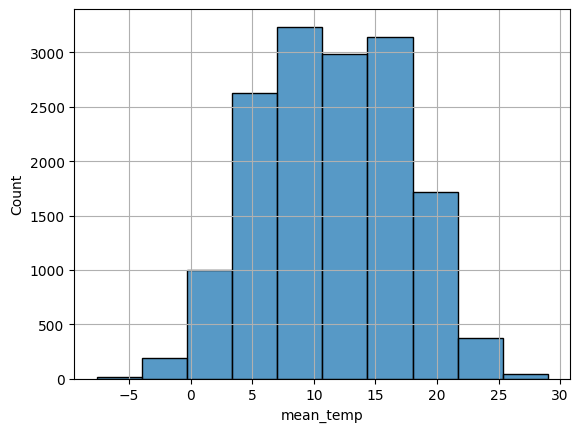

In [ ]:
sns.histplot(df['mean_temp'],bins=10)
plt.grid()
plt.show();

In [ ]:
import plotly.express as px

fig = px.bar(df, x='mean_temp', y='global_radiation',
             color='mean_temp',
             title='Global Radiation Against Average temperature',
             labels={'mean_temp': 'Average temperature', 'global_radiation': 'Global Radiation'},
             height=400, width=800)

fig.update_layout(
    plot_bgcolor='gray',
    paper_bgcolor='white'
)

fig.show()

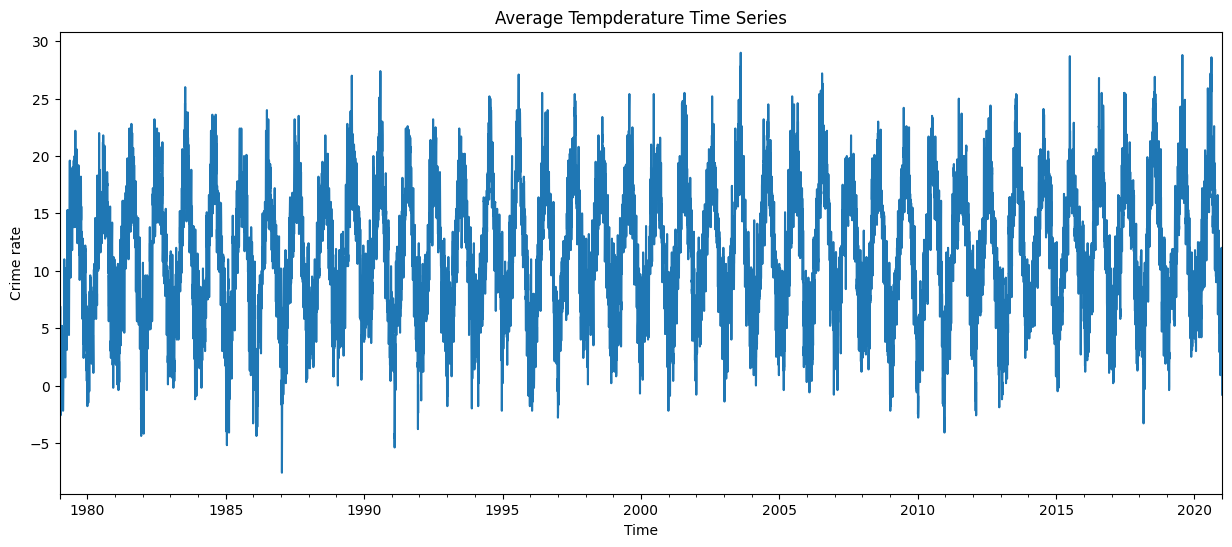

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df['mean_temp'].plot(xlabel='Time',ylabel='Crime rate',title='Average Tempderature Time Series',ax=ax);

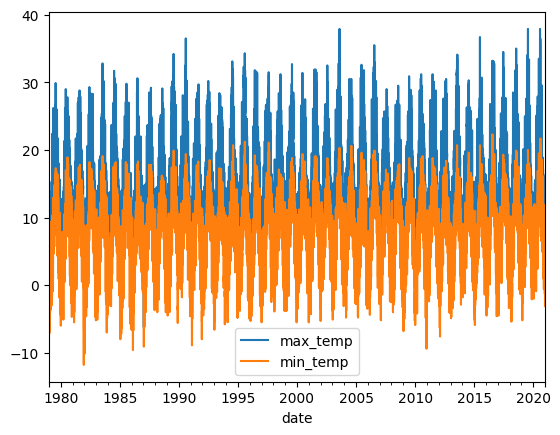

In [ ]:
df[['max_temp','min_temp']].plot()
plt.show();

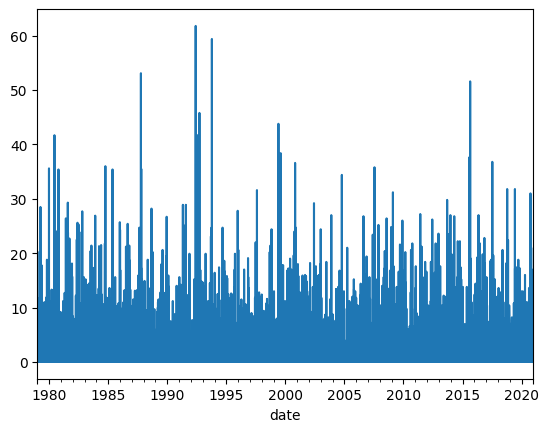

In [ ]:
df['precipitation'].plot()
plt.show();

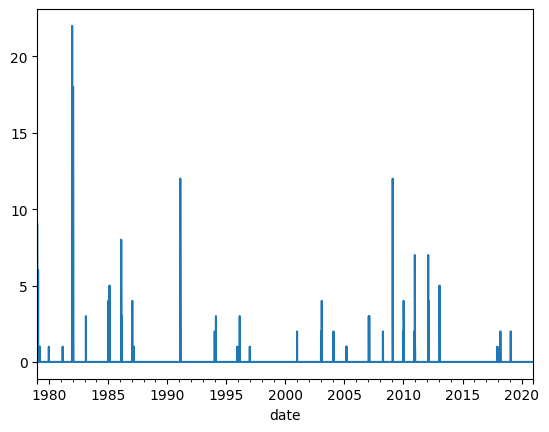

In [ ]:
df['snow_depth'].plot()
plt.show();

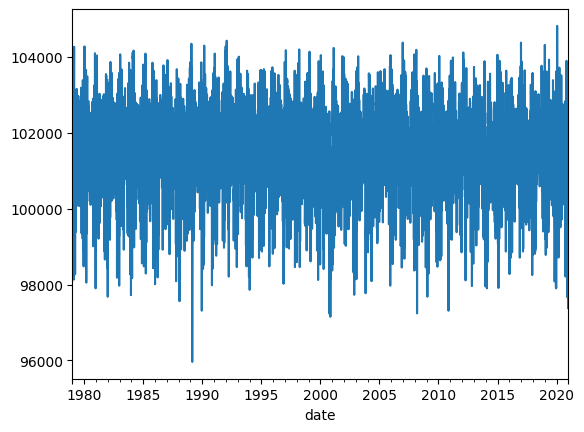

In [ ]:
df['pressure'].plot()
plt.show()

In [ ]:
fig = px.bar(df, x='mean_temp', y='pressure',
             color='mean_temp',
             title='Pressure Against Average temperature',
             labels={'mean_temp': 'Average temperature', 'Pressure': 'pressure'},
             height=400, width=800)

fig.update_layout(
    plot_bgcolor='gray',
    paper_bgcolor='white'
)

fig.show()

In [ ]:
X = df.drop(columns='mean_temp')
y = df['mean_temp']

In [ ]:
print(X.shape)
print(y.shape)

(15341, 8)
(15341,)


In [ ]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]

split_index = int(len(y) * split_ratio)
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (12272, 8)
shape of X_test: (3069, 8)
shape of y_train: (12272,)
shape of y_test: (3069,)


##Baseline model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_mean = y_train.mean()
Baseline = [y_mean] * len(y_train)
Baseline_rmse = np.sqrt(mean_squared_error(y_train,Baseline))
print('Root mean squared error for baseline model: ',round(Baseline_rmse))

Root mean squared error for baseline model:  6


##Model

In [ ]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def create_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
keras_regressor = KerasRegressor(build_fn=create_model, epochs=25, batch_size=32, verbose=1)

<ipython-input-31-f83e8825fb3a>:1: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('keras_regressor', keras_regressor)
])

In [ ]:
model.fit(X_train,y_train)

Epoch 1/25
384/384 [==============================] - 5s 7ms/step - loss: 30.8544
Epoch 2/25
384/384 [==============================] - 2s 6ms/step - loss: 13.4186
Epoch 3/25
384/384 [==============================] - 2s 6ms/step - loss: 12.3038
Epoch 4/25
384/384 [==============================] - 2s 6ms/step - loss: 9.2390
Epoch 5/25
384/384 [==============================] - 2s 6ms/step - loss: 2.2827
Epoch 6/25
384/384 [==============================] - 3s 8ms/step - loss: 1.4106
Epoch 7/25
384/384 [==============================] - 2s 6ms/step - loss: 1.2743
Epoch 8/25
384/384 [==============================] - 2s 6ms/step - loss: 1.1515
Epoch 9/25
384/384 [==============================] - 2s 6ms/step - loss: 1.1089
Epoch 10/25
384/384 [==============================] - 2s 6ms/step - loss: 1.0602
Epoch 11/25
384/384 [==============================] - 3s 8ms/step - loss: 1.0686
Epoch 12/25
384/384 [==============================] - 2s 6ms/step - loss: 0.9907
Epoch 13/25
384/384 [=

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('keras_regressor',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x7b07f4bf3820>)])

In [ ]:
y_pred = model.predict(X_test)

96/96 [==============================] - 1s 7ms/step


In [ ]:
y_pred_training = model.predict(X_train)
train_mse = mean_squared_error(y_train,y_pred_training)
train_rmse = np.sqrt(train_mse)
print('Root mean squared error for training data: ',round(train_rmse))

384/384 [==============================] - 2s 4ms/step
Root mean squared error for training data:  1


In [ ]:
y_pred_test = model.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred_test)
test_rmse = np.sqrt(test_mse)
print('Root mean squared error for testing data: ',round(test_rmse))

96/96 [==============================] - 0s 4ms/step
Root mean squared error for testing data:  1


In [ ]:
df_pred_test = pd.DataFrame(
        {
            'y_test':y_test,
            'y_pred_testing':np.round(model.predict(X_test),1)
        }
            )
df_pred_test.head(10)

96/96 [==============================] - 0s 3ms/step


,y_test,y_pred_testing
date,,
2012-08-07,15.7,15.900000
2012-08-08,19.2,20.100000
2012-08-09,19.8,20.200001
2012-08-10,20.9,20.700001
2012-08-11,19.4,21.299999
2012-08-12,21.1,20.500000
2012-08-13,19.2,18.700001
2012-08-14,21.2,21.799999
2012-08-15,20.5,20.100000


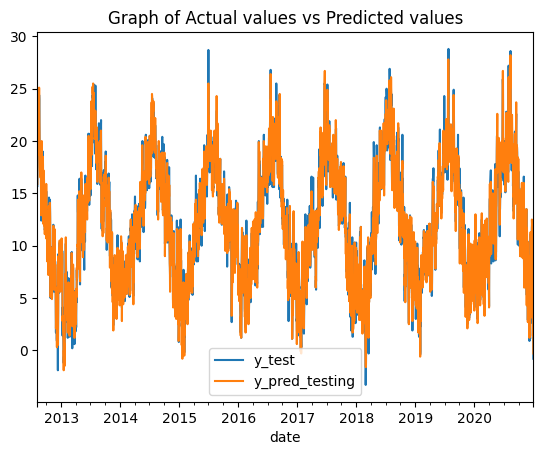

In [ ]:
df_pred_test.plot()
plt.title('Graph of Actual values vs Predicted values')
plt.show();

In [ ]:
def make_predictions(date,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth):
  data = {
        'date' : date,
        'cloud_cover': [cloud_cover],
        'sunshine': [sunshine],
        'global_radiation': [global_radiation],
        'max_temp': [max_temp],
        'min_temp': [min_temp],
        'precipitation': [precipitation],
        'pressure': [pressure],
        'snow_depth': [snow_depth]
    }
  df = pd.DataFrame(data,index=[i for i in range(2)])
  df = df.set_index('date')

  prediction = model.predict(df).round(2)[0]
  return f"Predicted Average temperature is  {round(prediction,1)}°C"




In [ ]:
date = input("Enter date: ")
cloud_cover = input("Enter the cloud cover: ")
sunshine = input("Enter sunshine: ")
global_radiation = input("Enter global radiation: ")
max_temp = input("Enter the max temp: ")
min_temp = input("Enter the min temp: ")
precipitation = input("Enter precipitation: ")
pressure = input("Enter pressure: ")
snow_depth = input("Enter snow depth: ")
make_predictions(date,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth)

Enter date: 2024-05-04
Enter the cloud cover: 7.3
Enter sunshine: 22
Enter global radiation: 15
Enter the max temp: 28
Enter the min temp: 2
Enter precipitation: 0.4
Enter pressure: 9.0
Enter snow depth: 0.0
1/1 [==============================] - 0s 27ms/step


'Predicted Average temperature is  17.299999237060547°C'